In [1]:
import pandas as pd 

In [2]:
PATH_TO_EMOTIONS = "../data/emotions.csv"

In [3]:
emotions_data = pd.read_csv(PATH_TO_EMOTIONS)
emotions_data.head()

,text,label
0,i feel so pissed off over an old friend and so...,anger
1,ive found it has made a huge difference especi...,anger
2,i also feel it is unfortunate that nearly all ...,sadness
3,i feel petty a href http clairee,anger
4,i used to believe that a feeling like fear was...,sadness


In [4]:
emotions_data["label"].unique()

array(['anger', 'sadness', 'joy', 'love', 'fear', 'surprise'],
      dtype=object)

In [5]:
emotions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20000 non-null  object
 1   label   20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [6]:
# count total for each unique label
emotions_data["label"].value_counts()   

label
joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: count, dtype: int64

In [7]:
emotions_data.shape

(20000, 2)

In [8]:
import pandas as pd
import random
import re
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

[nltk_data] Downloading package punkt to /Users/Cyrille/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Cyrille/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Cyrille/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
stopwords = set(stopwords.words('english'))
# def clean_text(text):
#     text = text.lower() # lowercase text
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
#     text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
#     text = re.sub('[‘’“”…]', '', text) # remove special characters
#     text = re.sub('\n', '', text) # remove new line characters
#     # remove hyperlinks and hashtags
#     text = re.sub('https?:\/\/.*[\r\n]*', '', text)
#     # remore href links
#     text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text)
#     # remove stopwords
#     text = ' '.join(word for word in text.split() if word not in stopwords)
#     # tokenize text 
#     text = nltk.word_tokenize(text)
#     # lemmatize text
#     lem = WordNetLemmatizer()
#     text = [lem.lemmatize(word) for word in text]
#     text = " ".join(text)
    
    
#     return text
def clean_text(text):
    text = text.lower() # lowercase text
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
    text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
    text = re.sub('\n', '', text) # remove new line characters
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove hyperlinks

    # tokenize text
    tokens = nltk.tokenize.word_tokenize(text)

    # remove stopwords
    tokens = [word for word in tokens if word not in stopwords]

    # lemmatize text
    lem = WordNetLemmatizer()
    tokens = [lem.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

In [10]:
emotions_data["text"] = emotions_data["text"].apply(clean_text)

In [11]:
emotions_data.head()

,text,label
0,feel pissed old friend friend,anger
1,ive found made huge difference especially fing...,anger
2,also feel unfortunate nearly reader going meet...,sadness
3,feel petty href http clairee,anger
4,used believe feeling like fear ignored suppres...,sadness


In [12]:
count_vectorizer = CountVectorizer()
a = count_vectorizer.fit_transform(emotions_data["text"])
a.shape

(20000, 15081)

In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping

texts = emotions_data["text"].tolist()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))



2023-12-25 13:52:05.830611: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 15102 unique tokens.


In [14]:
emotions_data["text"] = emotions_data["text"].apply(lambda x: tokenizer.texts_to_sequences([x])[0])

In [15]:
emotions_data.head()

,text,label
0,"[1, 403, 169, 43, 43]",anger
1,"[20, 222, 46, 904, 981, 174, 855, 1877, 581, 1...",anger
2,"[40, 1, 655, 1115, 627, 27, 678, 265, 2430, 12...",sadness
3,"[1, 553, 102, 83, 7536]",anger
4,"[224, 196, 2, 3, 481, 504, 3212, 37, 71, 96]",sadness


In [16]:
X, y = emotions_data["text"], emotions_data["label"]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state = 42)

In [19]:
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)
x_val = pad_sequences(x_val, maxlen=100)


In [20]:
y_train[:10], y_test[:10], y_val[:10]

(252          joy
 18632        joy
 19138       fear
 1673       anger
 17688       love
 8687       anger
 17425      anger
 11006    sadness
 4157         joy
 3440       anger
 Name: label, dtype: object,
 10650        love
 2041      sadness
 8668          joy
 1114      sadness
 13902       anger
 11963         joy
 11072        love
 3002     surprise
 19771     sadness
 8115         fear
 Name: label, dtype: object,
 17353     sadness
 16081       anger
 8282      sadness
 1113      sadness
 9546     surprise
 9413         fear
 7775          joy
 9407         fear
 964           joy
 13581     sadness
 Name: label, dtype: object)

In [21]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder and transform the labels to integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

# Now convert integer labels to one-hot vectors
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)
y_val = to_categorical(y_val_encoded)


In [22]:
y_train_encoded[:10], y_test_encoded[:10], y_val_encoded[:10]

(array([2, 2, 1, 0, 3, 0, 0, 4, 2, 0]),
 array([3, 4, 2, 4, 0, 2, 3, 5, 4, 1]),
 array([4, 0, 4, 4, 5, 1, 2, 1, 2, 4]))

In [23]:
def build_model():
    model = Sequential()
    model.add(Embedding(len(word_index) + 1, 128))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(6, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [24]:
model = build_model()

In [25]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128,validation_data=(x_val, y_val),callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
100/100 [==============================] - 38s 352ms/step - loss: 1.4822 - accuracy: 0.4162 - val_loss: 1.1044 - val_accuracy: 0.6169
Epoch 2/10
100/100 [==============================] - 32s 321ms/step - loss: 0.9146 - accuracy: 0.7366 - val_loss: 0.6054 - val_accuracy: 0.8109
Epoch 3/10
100/100 [==============================] - 33s 333ms/step - loss: 0.3076 - accuracy: 0.9052 - val_loss: 0.3636 - val_accuracy: 0.8747
Epoch 4/10
100/100 [==============================] - 31s 313ms/step - loss: 0.1373 - accuracy: 0.9607 - val_loss: 0.3508 - val_accuracy: 0.8875
Epoch 5/10
100/100 [==============================] - 31s 313ms/step - loss: 0.0771 - accuracy: 0.9766 - val_loss: 0.3363 - val_accuracy: 0.8922
Epoch 6/10
100/100 [==============================] - 31s 315ms/step - loss: 0.0511 - accuracy: 0.9848 - val_loss: 0.3368 - val_accuracy: 0.8963
Epoch 7/10
100/100 [==============================] - 31s 314ms/step - loss: 0.0388 - accuracy: 0.9884 - val_loss: 0.3680 - val_ac

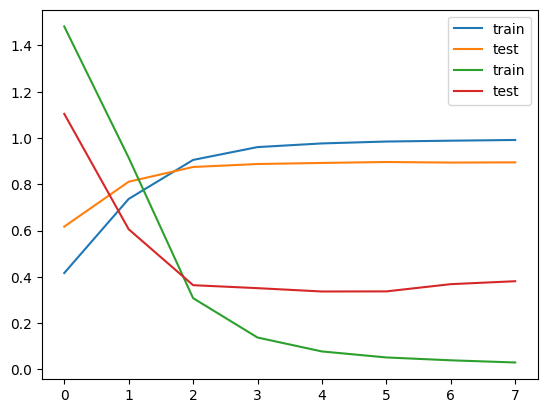

In [26]:
# plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.legend()

In [27]:
model.evaluate(x_test, y_test)

125/125 [==============================] - 3s 19ms/step - loss: 0.4045 - accuracy: 0.8907


[0.40448254346847534, 0.890749990940094]

In [28]:
preds = model.predict(x_test)

125/125 [==============================] - 3s 22ms/step


In [29]:
preds = preds.argmax(axis=1)

In [30]:
preds[:10]

array([3, 4, 2, 4, 0, 2, 3, 1, 4, 1])

In [31]:
y_test = y_test.argmax(axis=1)

In [32]:
y_test[:10]

array([3, 4, 2, 4, 0, 2, 3, 5, 4, 1])

In [33]:
# write a function that takes in a string and returns the predicted emotion
def predict_emotion(text):
    text = clean_text(text)
    text = tokenizer.texts_to_sequences([text])
    text = pad_sequences(text, maxlen=100)
    pred = model.predict(text)
    pred = pred.argmax(axis=1)
    return label_encoder.inverse_transform(pred)[0]

In [34]:
predict_emotion("I am so happy today!")

1/1 [==============================] - 0s 424ms/step


'joy'

In [35]:
predict_emotion("I am so sad today!")

1/1 [==============================] - 0s 43ms/step


'sadness'

In [37]:
predict_emotion("I am so furious today!")

1/1 [==============================] - 0s 44ms/step


'anger'

In [38]:
predict_emotion("It was so unfortunate that I lost my job today!")

1/1 [==============================] - 0s 36ms/step


'sadness'

In [39]:
emotions_data_2 = pd.read_csv("../data/emotions.csv")

In [40]:
# love data 
love_data = emotions_data_2[emotions_data_2["label"] == "love"]

In [51]:
a = love_data["text"].iloc[100]
b = love_data["label"].iloc[100]
a,b 

('i had to have a blood test yesterday so perhaps im feeling particularly fond of it right now because of the doctors needle that was inside of me and the time spent with the dizzy head of a non meat eating nineteen year old female',
 'love')

In [52]:
predict_emotion(a), b

1/1 [==============================] - 0s 36ms/step


('love', 'love')